# Proyecto Individual Data Analytics: Accidentes aéreos

## Importamos las librerías necesarias 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Datasets/Accidentes_final.csv')

##  Análisis de las variables categóricas

###  Accidentes por país

In [8]:
#Considero agrupar por año los países con accidentes y contarlos
accidents_per_country = df.groupby('country')['year'].count()

In [9]:
#Elijo no considerar los países = other ya que no tengo información certera de la locación
accidents_per_country  = accidents_per_country.drop('other', errors='ignore')

In [10]:
#Me quedo con los 10 valores más altos
top_10_accidents_per_country=accidents_per_country.sort_values(ascending=False).head(10)

In [11]:
#Verifico los datos obtenidos
top_10_accidents_per_country

country
United States    1042
Russia            252
Brazil            176
Colombia          152
Canada            133
France            129
India             110
England           101
China              98
Indonesia          97
Name: year, dtype: int64

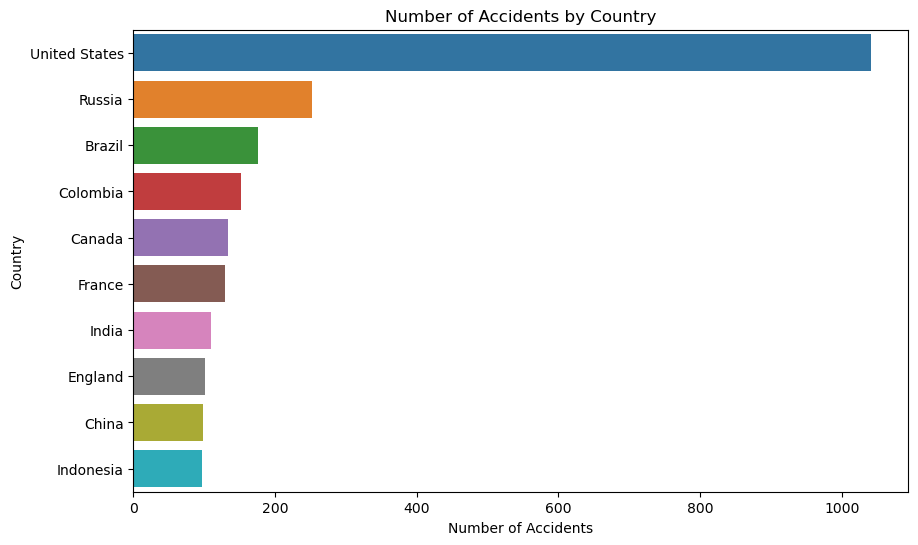

In [12]:

plt.figure(figsize=(10, 6))  
sns.barplot(x=top_10_accidents_per_country.values, y=top_10_accidents_per_country.index, linewidth=0.3)
plt.xlabel('Number of Accidents') 
plt.ylabel('Country')
plt.title('Number of Accidents by Country')  
plt.show()


Podemos llegar a la conclusión de que de los 5008 accidentes registrados, 1042 de ellos ocurrieron en Estados Unidos, lo que equivale al 20.8% del total de accidentes y muestra que un quinto de los accidentes tienen lugar en Estados Unidos.

###  Accidentes por ciudad

In [13]:
#Se cuenta la cantidad de accidentes por ciudad
accident_counts_city = df['city'].value_counts().sort_values(ascending=False).head(10)

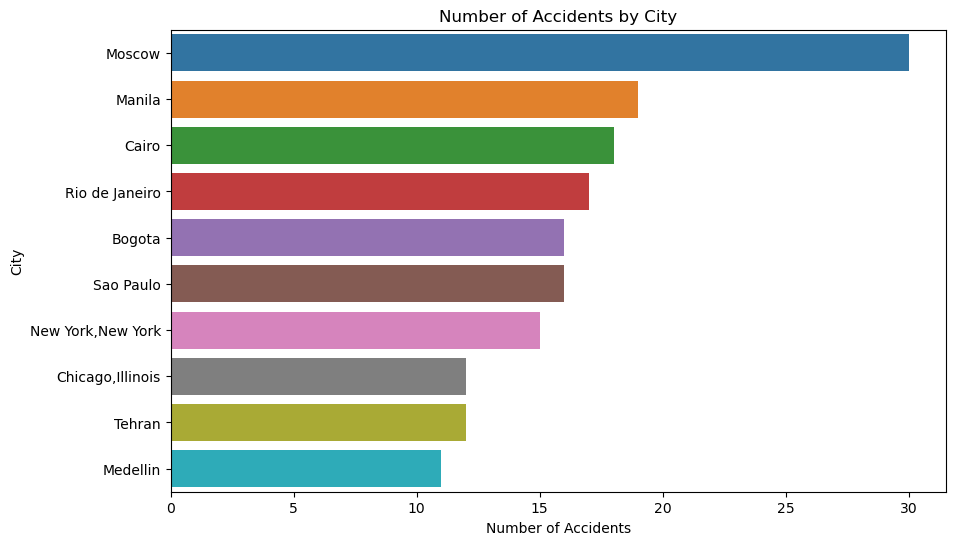

In [15]:
#Se grafican las ciudades con más accidentes
plt.figure(figsize=(10, 6))  
sns.barplot(x=accident_counts_city.values, y=accident_counts_city.index,)
plt.xlabel('Number of Accidents')  
plt.ylabel('City')  
plt.title('Number of Accidents by City')  
plt.show()

La ciudad con más accidentes de aviones es Moscú en Rusia.

### Accidentes por año

In [17]:
#Se cuentan los accidentes por año
accidents_per_year = df['year'].value_counts().sort_index(ascending=True)

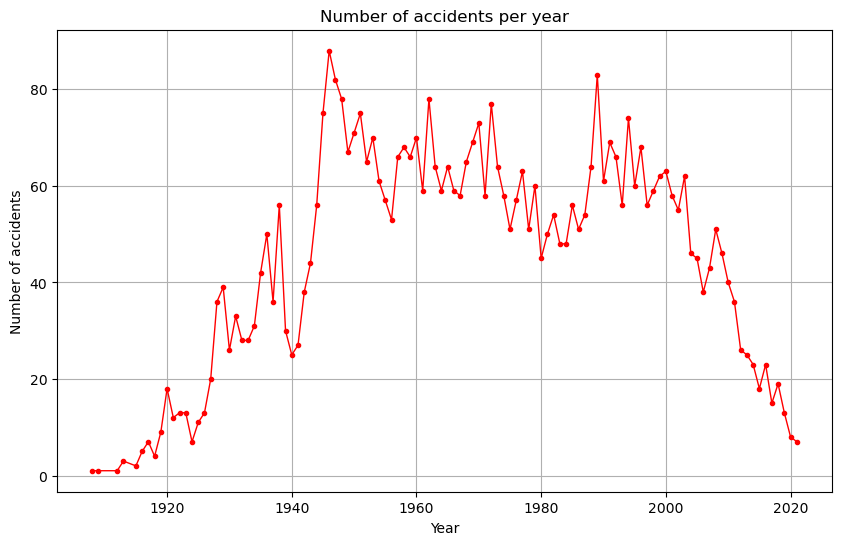

In [18]:
# Hacemos un grafico de lineas para visualizar tendencias a lo largo del tiempo
plt.figure(figsize=(10,6))
accidents_per_year.plot(kind='line',color='red', marker = ".", linewidth=1)
plt.title('Number of accidents per year')
plt.plot()
plt.xlabel('Year')
plt.ylabel('Number of accidents')
plt.grid(True)
plt.show()

In [12]:
accidents_per_year.max()

88

Podemos visualizar en este gráfico que el año con más accidentes, ocurrieron 88 accidentes 

### Más de un accidente por día

In [13]:
#Contamos los accidentes por día
accidents_per_day = df['date'].value_counts()
accidents_per_day

1988-08-31    4
2001-09-11    4
1945-02-23    3
1946-12-28    3
1992-08-27    3
             ..
1958-12-04    1
1958-12-23    1
1958-12-24    1
1958-12-26    1
2021-07-06    1
Name: date, Length: 4577, dtype: int64

In [14]:
#Revisamos los días con más accidentes
accidents_per_day.head(10)

1988-08-31    4
2001-09-11    4
1945-02-23    3
1946-12-28    3
1992-08-27    3
1978-09-03    3
1985-10-11    3
1989-07-19    3
1946-12-25    3
1970-12-31    3
Name: date, dtype: int64

Podemos ver que en las fechas con más accidentes aéreos por si hay alguna cuestión para considerar.

In [15]:
df[df['date']=='1988-08-31']

,date,time,location,airline_operator,route,aircraft_type,all_aboard,passengers_aboard,crew_aboard,total_fatalities,...,crew_fatalities,summary,year,date_time,country,city,accident_on_water,category,survivors,survival_rate
3508,1988-08-31,NaN,"Merida,Mexico",Aerocaribe,Sin Dato,Convair CV-240,20.0,NaN,NaN,1.0,...,NaN,Crashed while taking off.,1988,NaN,Mexico,Merida,False,passenger,19.0,95.00
3509,1988-08-31,09:19:00,"Kowloon Bay,Hong Kong",CAAC,Guangzhou - Hong Kong,Hawker Siddeley HS-121 Trident 2E,89.0,78.0,11.0,7.0,...,6.0,The right outboard flap of the plane hit the a...,1988,1988-08-31 09:19:00,other,Kowloon Bay,False,passenger,82.0,92.13
3510,1988-08-31,09:01:00,"Dallas,Texas",Delta Air Lines,"Dallas/Fort Worth, TX - Salt Lake City, UT",Boeing B-727-232 Adv,108.0,101.0,7.0,14.0,...,2.0,The aircraft stalled and crashed during takeof...,1988,1988-08-31 09:01:00,United States,Dallas,False,passenger,94.0,87.04
3511,1988-08-31,10:00:00,"Cerro de la Calera,Mexico",Transporte Aereo Federal,Uruapan - Lazro,Embraer 110P1 Bandeirante,20.0,18.0,2.0,20.0,...,2.0,The plane disappeared after taking off from Ur...,1988,1988-08-31 10:00:00,Mexico,Cerro de la Calera,False,passenger,0.0,0.00


In [16]:
df[df['date']=='2001-09-11']

,date,time,location,airline_operator,route,aircraft_type,all_aboard,passengers_aboard,crew_aboard,total_fatalities,...,crew_fatalities,summary,year,date_time,country,city,accident_on_water,category,survivors,survival_rate
4345,2001-09-11,09:45:00,"Arlington,Virginia.",American Airlines,Washington D.C. - Los Angeles,Boeing B-757-223,64.0,58.0,6.0,64.0,...,6.0,The aircraft was hijacked after taking off fro...,2001,2001-09-11 09:45:00,United States,Arlington,False,passenger,0.0,0.0
4346,2001-09-11,08:47:00,"New York City,New York",American Airlines,Boston - Los Angeles,Boeing 767-223ER,92.0,81.0,11.0,92.0,...,11.0,The aircraft was hijacked shortly after it lef...,2001,2001-09-11 08:47:00,United States,New York City,False,passenger,0.0,0.0
4347,2001-09-11,09:03:00,"New York City,New York",United Air Lines,Boston - Los Angeles,Boeing B-767-222,65.0,56.0,9.0,65.0,...,9.0,The aircraft was hijacked shortly after it lef...,2001,2001-09-11 09:03:00,United States,New York City,False,passenger,0.0,0.0
4348,2001-09-11,10:03:00,"Shanksville,Pennsylvania",United Air Lines,Newark - San Francisco,Boeing B-757-222,44.0,37.0,7.0,44.0,...,7.0,The aircraft was hijacked after taking off fro...,2001,2001-09-11 10:03:00,United States,Shanksville,False,passenger,0.0,0.0


In [17]:
df[df['date']=='2001-09-11']['summary']

4345    The aircraft was hijacked after taking off fro...
4346    The aircraft was hijacked shortly after it lef...
4347    The aircraft was hijacked shortly after it lef...
4348    The aircraft was hijacked after taking off fro...
Name: summary, dtype: object

Es evidente que se trata del día en que ocurrió el atentado a las Torres Gemelas. Aunque los aviones tienen la misma ubicación y ruta, podemos distinguir que se trata de aeronaves diferentes gracias a los detalles proporcionados en el resumen, que nos ofrecen más información sobre lo que sucedió en esa ocasión.

###  Accidentes por aerolínea operadora

In [19]:
#Contamos los accidentes por aerolinea
accidents_per_airline_operator=df['airline_operator'].value_counts().sort_values(ascending=False).head(10)

In [20]:
#Revisamos los valores con más accidentes
accidents_per_airline_operator

Aeroflot                               253
Military - U.S. Air Force              141
Air France                              74
Deutsche Lufthansa                      63
United Air Lines                        44
China National Aviation Corporation     43
Military - U.S. Army Air Forces         43
Pan American World Airways              41
American Airlines                       37
US Aerial Mail Service                  35
Name: airline_operator, dtype: int64

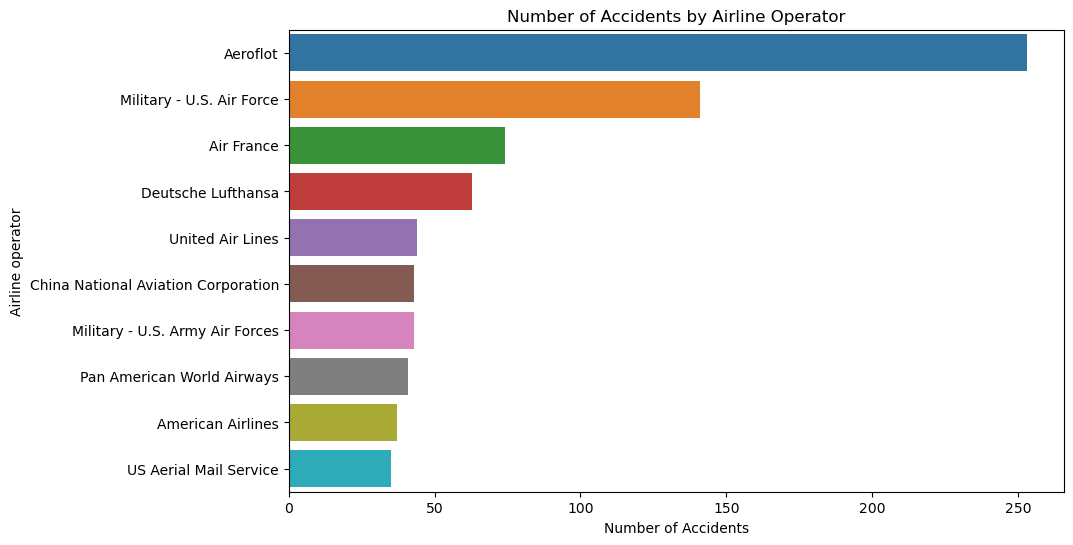

In [22]:
#Graficamos
plt.figure(figsize=(10, 6))  
sns.barplot(x=accidents_per_airline_operator.values, y=accidents_per_airline_operator.index)
plt.xlabel('Number of Accidents')  
plt.ylabel('Airline operator')  
plt.title('Number of Accidents by Airline Operator')  
plt.show()

La aerolínea con mayor accidentes aéreos fue Aeroflot, esta es una aerolinea comercial rusa, lo que justifica que Moscú sea la ciudad con mas accidentes.

### Accidentes por tipo de aeronave

In [24]:
#Se cuentan los accidentes por tipo de aeronave
accidents_per_aircraft_type=df['aircraft_type'].value_counts().sort_values(ascending=False).head(10)

In [25]:
#Revisamos los tipos de aeronaves con más accidentes
accidents_per_aircraft_type

Douglas DC-3                                333
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                70
Douglas C-47                                 64
Douglas DC-4                                 41
Antonov AN-26                                35
Yakovlev YAK-40                              35
Junkers JU-52/3m                             30
Douglas C-47B                                27
Douglas DC-6B                                27
Name: aircraft_type, dtype: int64

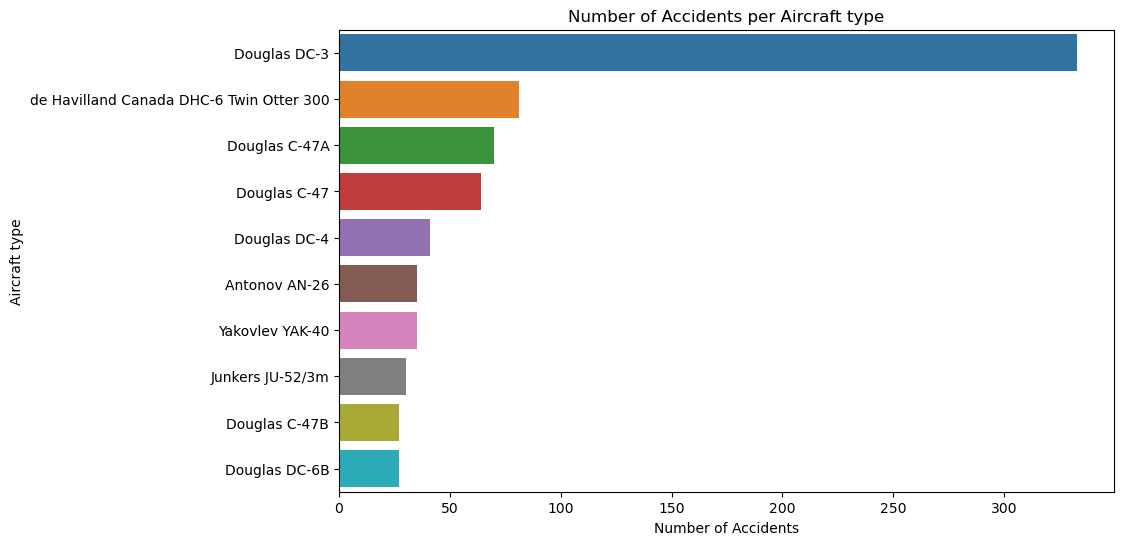

In [26]:
#Graficamos
plt.figure(figsize=(10, 6))  
sns.barplot(x=accidents_per_aircraft_type.values, y=accidents_per_aircraft_type.index)
plt.xlabel('Number of Accidents')  
plt.ylabel('Aircraft type')  
plt.title('Number of Accidents per Aircraft type')  
plt.show()

El tipo de aeronave con mayor cantidad de accidentes registrados es Douglas DC-3.

###  Accidentes por categoría de aeronaves: militares o de pasajeros

In [5]:
#Diferenciamos según la categoría de los aviones, contando los valores de cada uno
category=df['category'].value_counts()
category

passenger    4217
military      791
Name: category, dtype: int64

Text(0.5, 1.0, 'Accidentes por categoria')

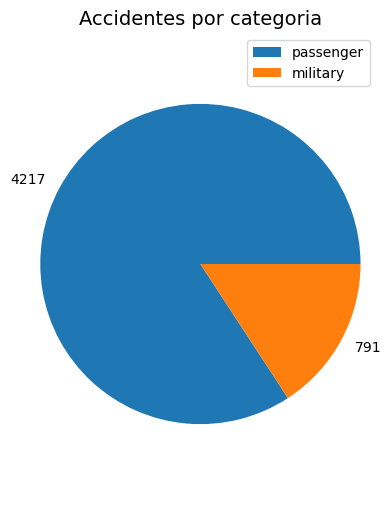

In [7]:
#Graficamos la composición de la categoría de aeronave

plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
patches, texts = plt.pie(category, labels=category, startangle=360)
plt.legend(patches, category.index, loc="best", fontsize=10)
plt.axis('equal')
plt.title('Accidentes por categoria', loc='Center', fontsize=14)

El 15% corresponde con aviones militares, y el restantes 85% son aviones comerciales

## Análisis de las variables cuantitativas

###  Resumen de variables estadísticas

Vamos a identificar las variables numéricas en nuestro conjunto de datos. Podemos concluir que nuestras variables cuantitativas abarcan las siguientes columnas: all_aboard, passenger_aboard, crew_aboard, total_fatalities, passenger_fatalities, crew_fatalities, year, survivors y survival_rate.

In [27]:
df.describe()

,all_aboard,passengers_aboard,crew_aboard,total_fatalities,passenger_fatalities,crew_fatalities,year,survivors,survival_rate
count,4991.000000,4787.000000,4789.000000,5000.000000,4773.000000,4773.000000,5008.000000,4991.000000,4986.000000
mean,31.121218,26.877376,4.519524,22.294000,18.940708,3.587262,1970.851637,8.801643,18.229097
std,45.479965,44.035342,3.758072,35.000385,34.065190,3.177315,24.703696,30.639214,31.230762
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1908.000000,0.000000,0.000000
25%,7.000000,3.000000,2.000000,4.000000,1.000000,2.000000,1951.000000,0.000000,0.000000
50%,16.000000,12.000000,4.000000,11.000000,7.000000,3.000000,1970.000000,0.000000,0.000000
75%,35.000000,30.000000,6.000000,25.000000,21.000000,5.000000,1992.000000,3.000000,25.000000
max,644.000000,614.000000,83.000000,583.000000,560.000000,43.000000,2021.000000,516.000000,100.000000


###  Detectamos outliers

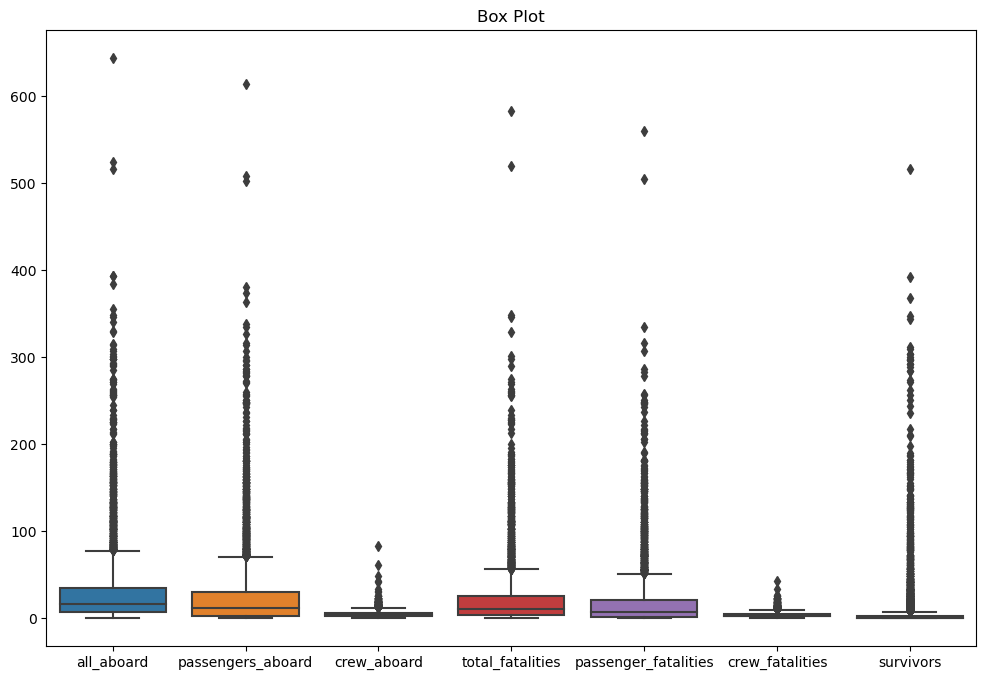

In [27]:

plt.figure(figsize=(12,8))
sns.boxplot(data=df[['all_aboard', 'passengers_aboard', 'crew_aboard', 'total_fatalities', 'passenger_fatalities', 'crew_fatalities','survivors']])
plt.title('Box Plot')
plt.show()

###  Matriz de correlación

Vamos a crear una matriz de correlación para ver el grado de correlación entre mis variables numéricas.

<AxesSubplot: >

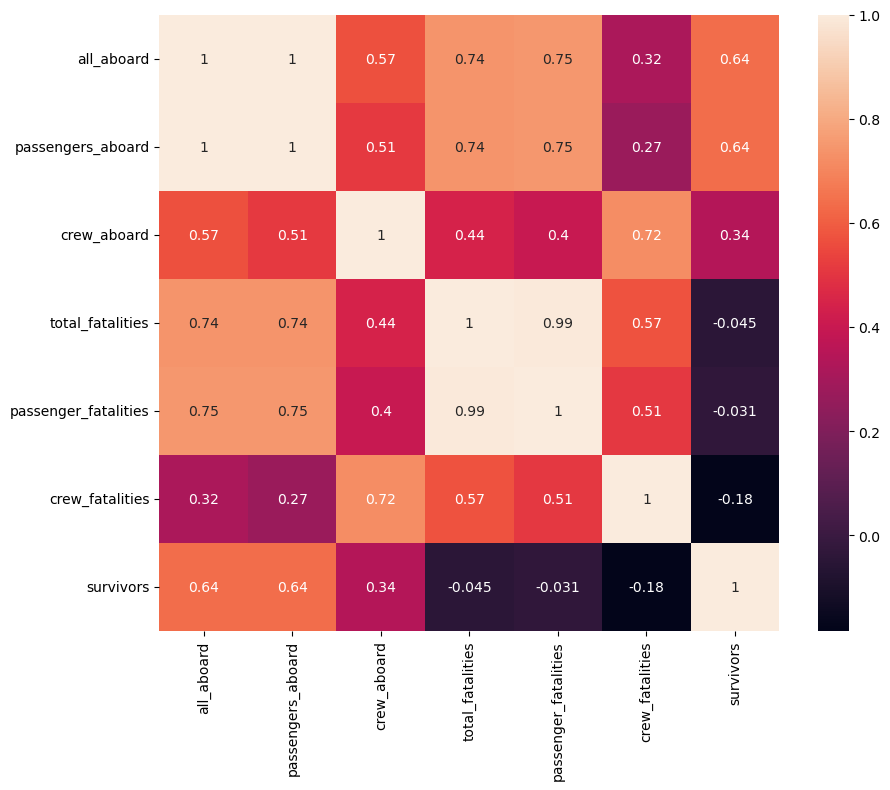

In [28]:
#Creamos la matriz de correlación
df_num = df[['all_aboard','passengers_aboard','crew_aboard','total_fatalities','passenger_fatalities','crew_fatalities', 'survivors']]
corr_matrix = df_num.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True)

Es evidente que existe una fuerte correlación entre varias de nuestras variables. Cuando aumenta el número de pasajeros a bordo, también aumenta el número de pasajeros y tripulación a bordo. Del mismo modo, un aumento en el total de fatalidades afecta tanto a las fatalidades de pasajeros como a las de la tripulación.

Sin embargo, se observa una correlación inversa entre el número de fatalidades y el número de sobrevivientes, lo que significa que a medida que aumentan las fatalidades, disminuye el número de sobrevivientes. Esta observación sugiere una relación inversa entre estas dos variables en los accidentes de aviación que estamos analizando.

### Fallecidos por año 

In [29]:
#Agrupamos los fallecidos totales por año
fatalities_per_year=df.groupby(df['year'])['total_fatalities'].sum()

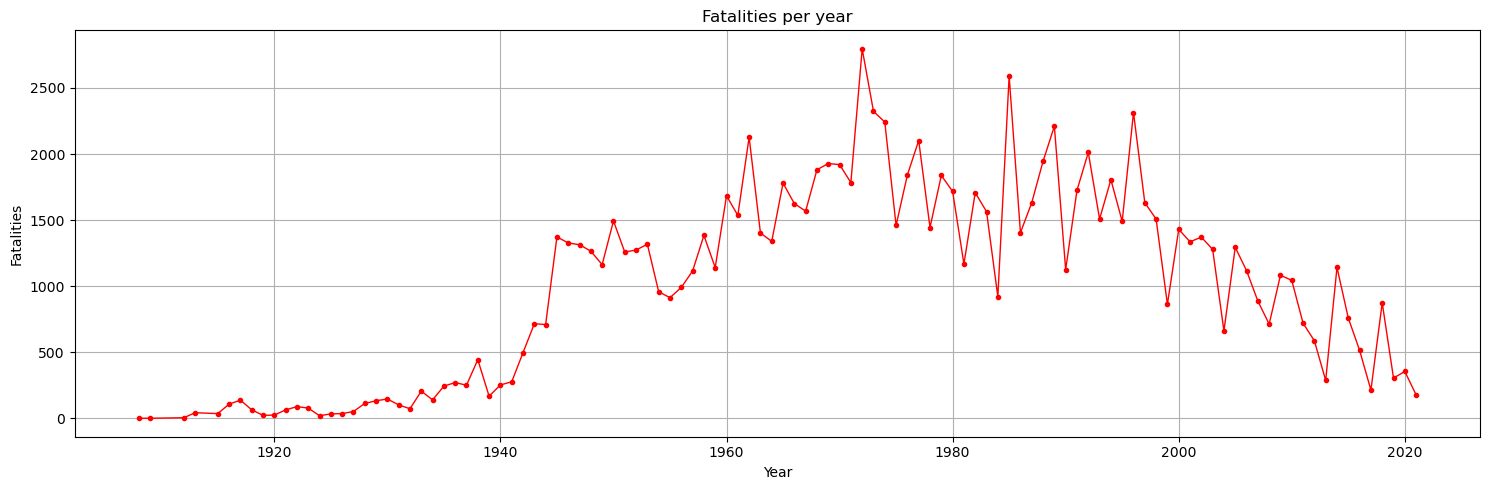

In [30]:

plt.figure(figsize=(15,5))
fatalities_per_year.plot(kind='line',color='red', marker = ".", linewidth=1)
plt.title('Fatalities per year')
plt.plot()
plt.xlabel('Year')
plt.ylabel('Fatalities')
plt.tight_layout() 
plt.grid(True)
plt.show()

In [31]:
fatalities_per_year = pd.DataFrame(fatalities_per_year)
max_fatalities_year = df['year'][df['total_fatalities'].idxmax()]
max_fatalities_year

1977

In [32]:
fatalities_per_year.max()

total_fatalities    2796.0
dtype: float64

1977 fue el año con mayor cantidad de de victimas fatales for accidentes aereos.

###  Pasajeros fallecidos

In [33]:

passenger_fatalities= df.groupby(df['year'])['passenger_fatalities'].sum()

In [34]:
passenger_fatalities

year
1908      1.0
1909      0.0
1912      0.0
1913      0.0
1915      0.0
        ...  
2017    172.0
2018    790.0
2019    263.0
2020    314.0
2021    108.0
Name: passenger_fatalities, Length: 111, dtype: float64

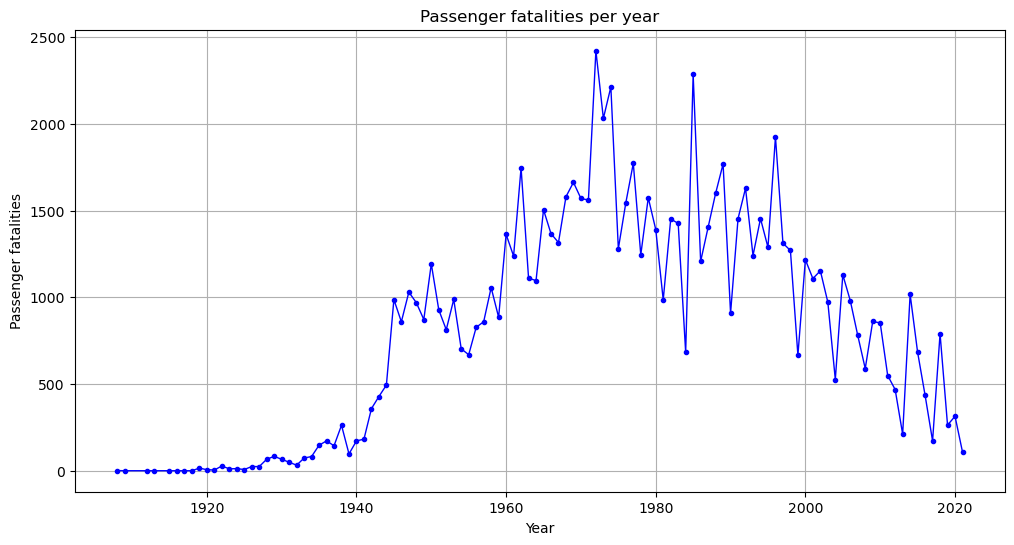

In [35]:
# Hacemos un grafico de lineas para visualizar tendencias a lo largo del tiempo
plt.figure(figsize=(12,6))
passenger_fatalities.plot(kind='line',color='blue', marker = ".", linewidth=1)
plt.title('Passenger fatalities per year')
plt.plot()
plt.xlabel('Year')
plt.ylabel('Passenger fatalities')
plt.grid(True)
plt.show()

####  Comparación de fallecidos de los pasajeros por año y pasajeros abordo.

In [36]:

comparison_passenger_fatalities = df.groupby(df['year'])[['passenger_fatalities', 'passengers_aboard']].sum()

In [37]:
comparison_passenger_fatalities

,passenger_fatalities,passengers_aboard
year,,
1908,1.0,1.0
1909,0.0,0.0
1912,0.0,0.0
1913,0.0,0.0
1915,0.0,0.0
...,...,...
2017,172.0,193.0
2018,790.0,1126.0
2019,263.0,380.0


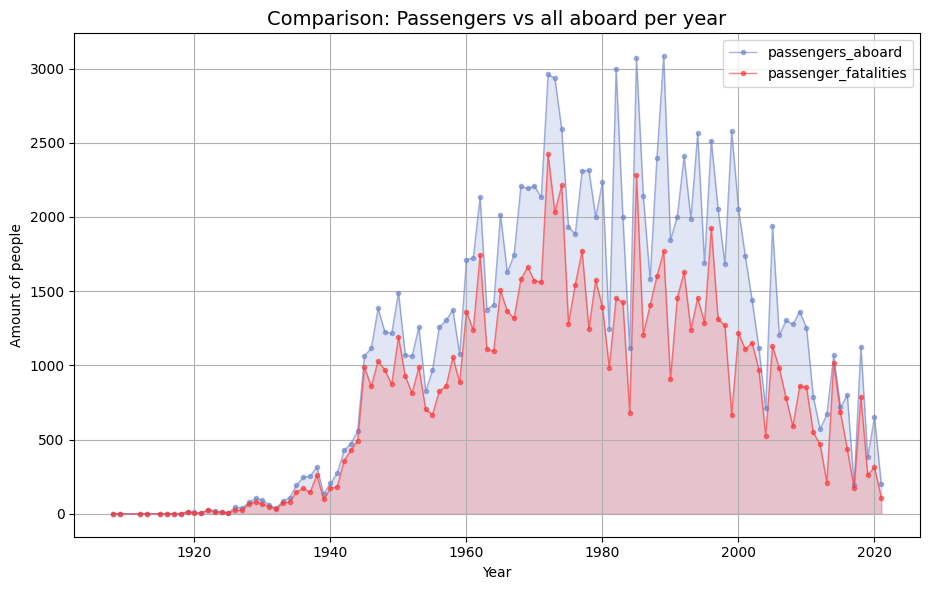

In [51]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.fill_between(comparison_passenger_fatalities.index, 'passengers_aboard', data=comparison_passenger_fatalities, color="#6d83c9", alpha=0.2)
plt.plot(comparison_passenger_fatalities.index, 'passengers_aboard', data=comparison_passenger_fatalities, marker=".", color="#6d83c9", alpha=0.6, linewidth=1)
plt.fill_between(comparison_passenger_fatalities.index, 'passenger_fatalities', data=comparison_passenger_fatalities, color="#ff3333", alpha=0.2)
plt.plot(comparison_passenger_fatalities.index, 'passenger_fatalities', data=comparison_passenger_fatalities, color="#ff3333", marker=".", alpha=0.6, linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Amount of people', fontsize=10)
plt.title('Comparison: Passengers vs all aboard per year', loc='Center', fontsize=14)
plt.tight_layout()
plt.grid(True)
plt.show()

### Sobrevivientes por año 

In [40]:
#Agrupamos los sobrevivientes por año
survivors_per_year=df.groupby(df['year'])['survivors'].sum()

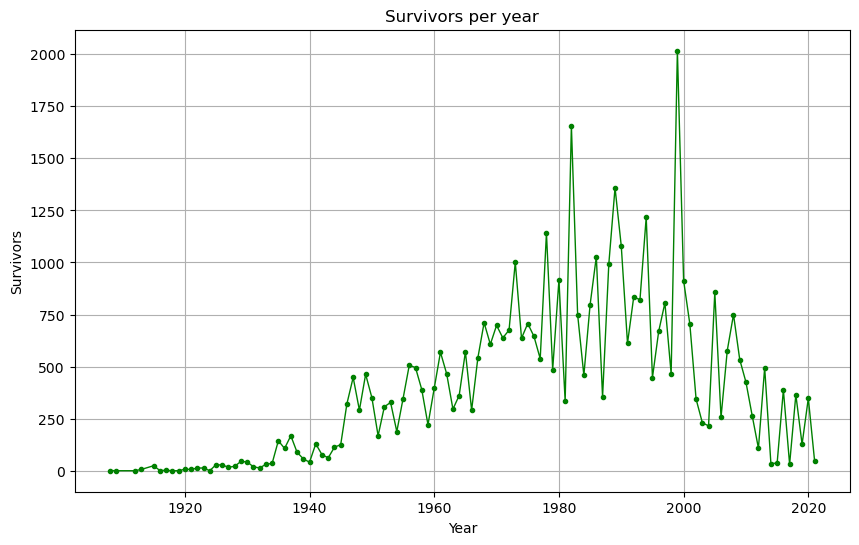

In [41]:
# Hacemos un grafico de lineas para visualizar tendencias a lo largo del tiempo
plt.figure(figsize=(10,6))
survivors_per_year.plot(kind='line',color='green', marker = ".", linewidth=1)
plt.title('Survivors per year')
plt.plot()
plt.xlabel('Year')
plt.ylabel('Survivors')
plt.grid(True)
plt.show()

Se nota una disminución de los sobrevivientes por año que puede estar ligado a una disminución del número de accidentes.

#### Comparación sobrevivientes por año y personas a bordo por año

In [42]:

comparison_survivors = df.groupby(df['year'])[['survivors', 'all_aboard']].sum()

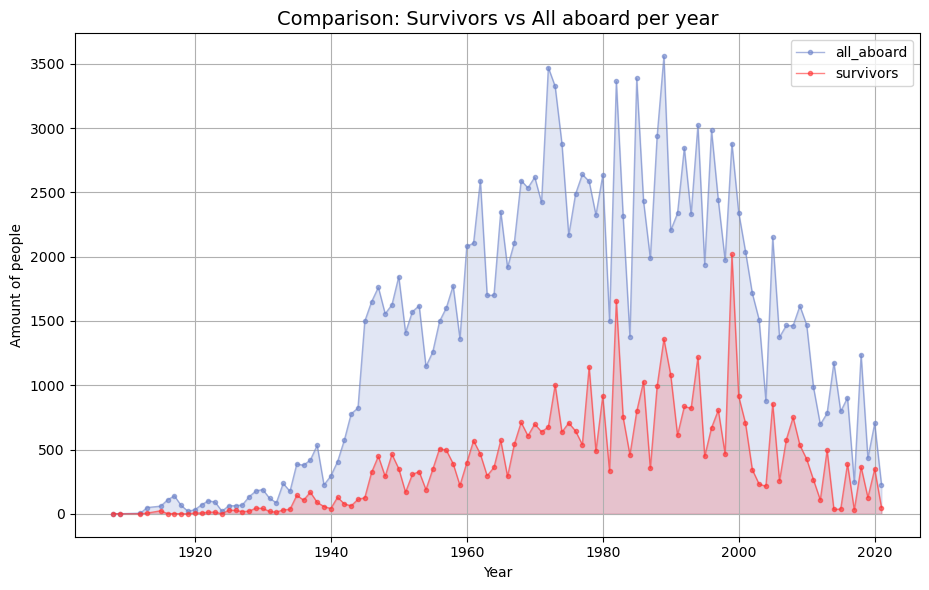

In [43]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.fill_between(comparison_survivors.index, 'all_aboard', data=comparison_survivors, color="#6d83c9", alpha=0.2)
plt.plot(comparison_survivors.index, 'all_aboard', data=comparison_survivors, marker=".", color="#6d83c9", alpha=0.6, linewidth=1)
plt.fill_between(comparison_survivors.index, 'survivors', data=comparison_survivors, color="#ff3333", alpha=0.2)
plt.plot(comparison_survivors.index, 'survivors', data=comparison_survivors, color="#ff3333", marker=".", alpha=0.6, linewidth=1)
plt.legend(fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Amount of people', fontsize=10)
plt.title('Comparison: Survivors vs All aboard per year', loc='Center', fontsize=14)
plt.tight_layout()
plt.grid(True)
plt.show()